# Question 4

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
root = './A2_resources/'

In [3]:
def read(path, arg = cv2.IMREAD_UNCHANGED):
    args = {'gray' : cv2.IMREAD_GRAYSCALE, 'unchanged' : cv2.IMREAD_UNCHANGED, 'color' : cv2.IMREAD_COLOR}
    return cv2.imread(path, args[arg])

In [4]:
def strided(img, kernel):
    img = img.astype('float32')
    img = np.pad(img, (np.int16((kernel.shape[0]-1)/2), np.int16((kernel.shape[1]-1)/2)), 'reflect')
    expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],
        img.strides[1],
    )
)
    return expanded_input

In [5]:
def conv2d(img, kernel):

    channels = 1
    if len(img.shape) > 2:
        channels = img.shape[2]

    if channels == 1:
        return np.tensordot(strided(img, kernel), kernel)
    else:
        res = np.tensordot(strided(img[:,:,0], kernel), kernel)
        for i in range(1,channels):
            res = np.dstack((res, np.tensordot(strided(img[:,:,i], kernel), kernel)))
        return res

## Part 1

In [6]:
def highBoost(img, window_size, weight):
    img = img.astype('float32')
    
    gauss = cv2.getGaussianKernel(window_size,2) 
    gauss = gauss@gauss.T
    
    ident = np.zeros((window_size,window_size))
    ident[window_size//2][window_size//2] = 1
    
    kernel = ((weight+1) * ident - weight*gauss)
    
    return np.uint8(np.clip(conv2d(img,kernel), 0, 255))

In [7]:
im = read(root+'bell.jpg', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

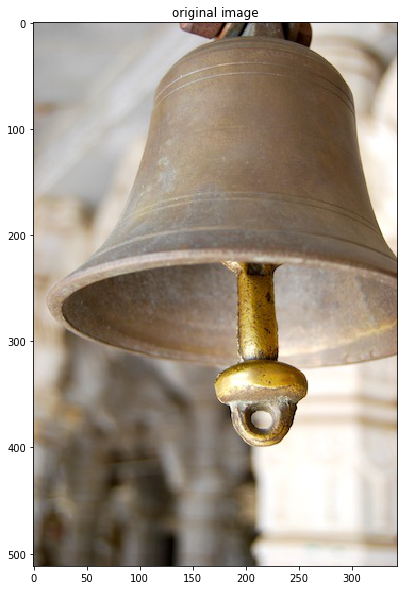

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.title('original image')
plt.show()

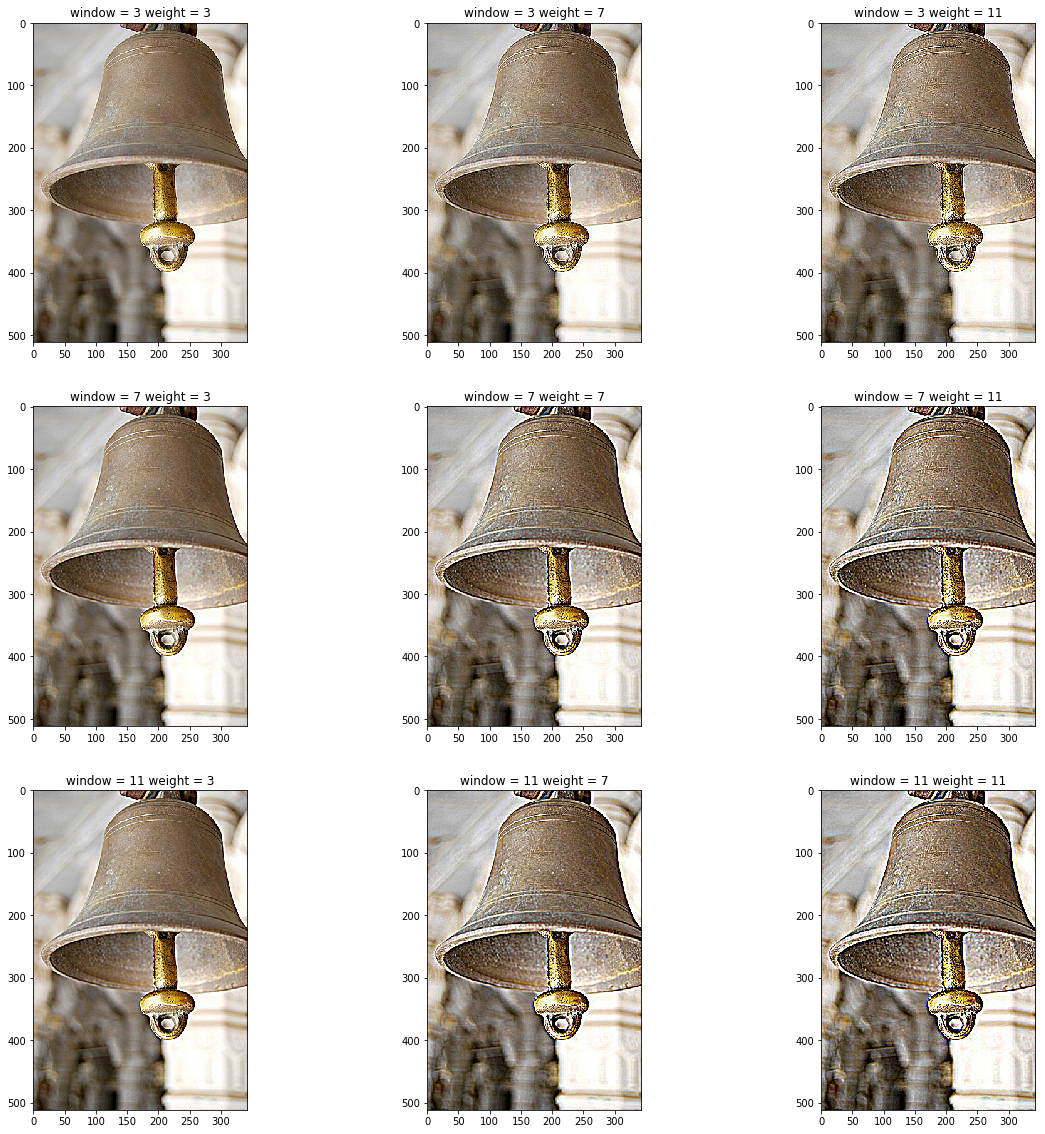

In [9]:
window = -1
_, plots = plt.subplots(3,3,figsize = (20,20))
for i in range(3):
    weight = 3
    window += 4
    for j in range(3):
        plots[i][j].imshow(highBoost(im, window, weight))
        plots[i][j].set_title('window = ' + str(window) + ' weight = ' + str(weight))
        weight += 4

plt.show()

### Observations
- Increasing the weight gives more detailed(and prominent) edges
- Increasing the window size gives more boosted edges but it gets more computationally expensive

## Part 2

In [10]:
im = read(root+'q4.jpg', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

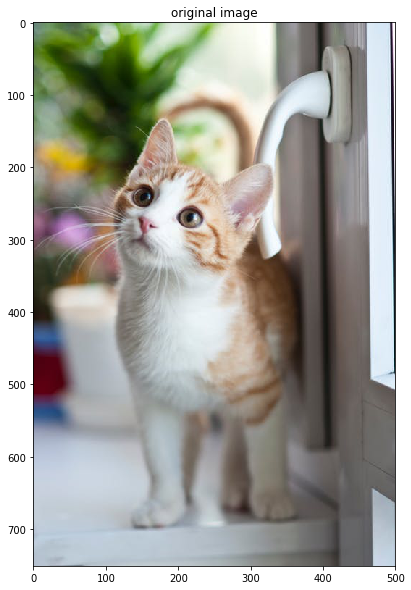

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.title('original image')
plt.show()

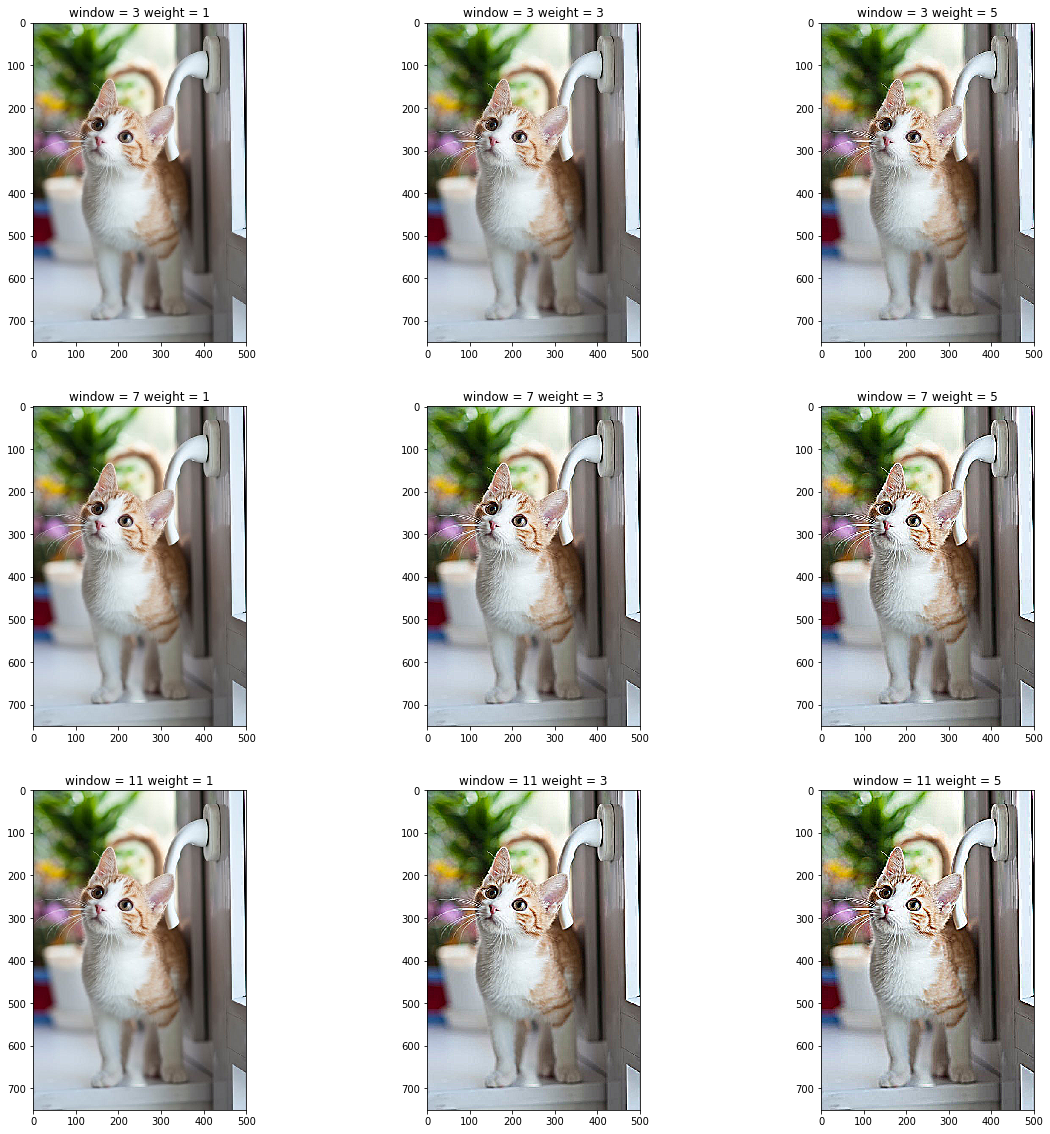

In [12]:
window = -1
weight = 3
_, plots = plt.subplots(3,3,figsize = (20,20))
for i in range(3):
    weight = 1
    window += 4
    for j in range(3):
        plots[i][j].imshow(highBoost(im, window, weight))
        plots[i][j].set_title('window = ' + str(window) + ' weight = ' + str(weight))
        weight += 2

plt.show()

In [13]:
im = read(root+'test2.jpg', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

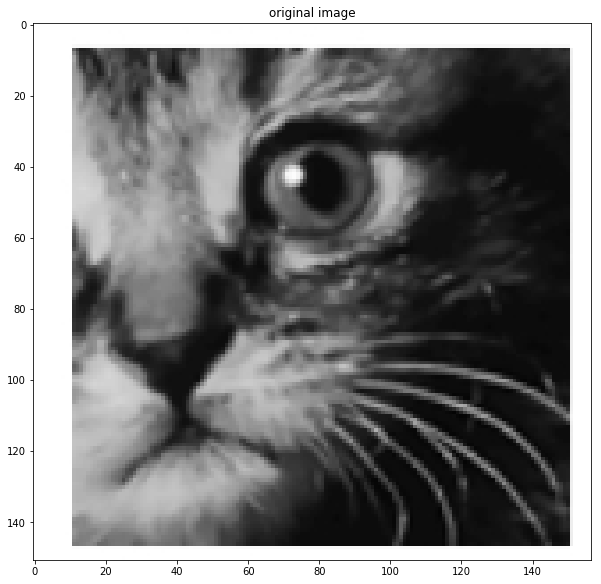

In [14]:
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.title('original image')
plt.show()

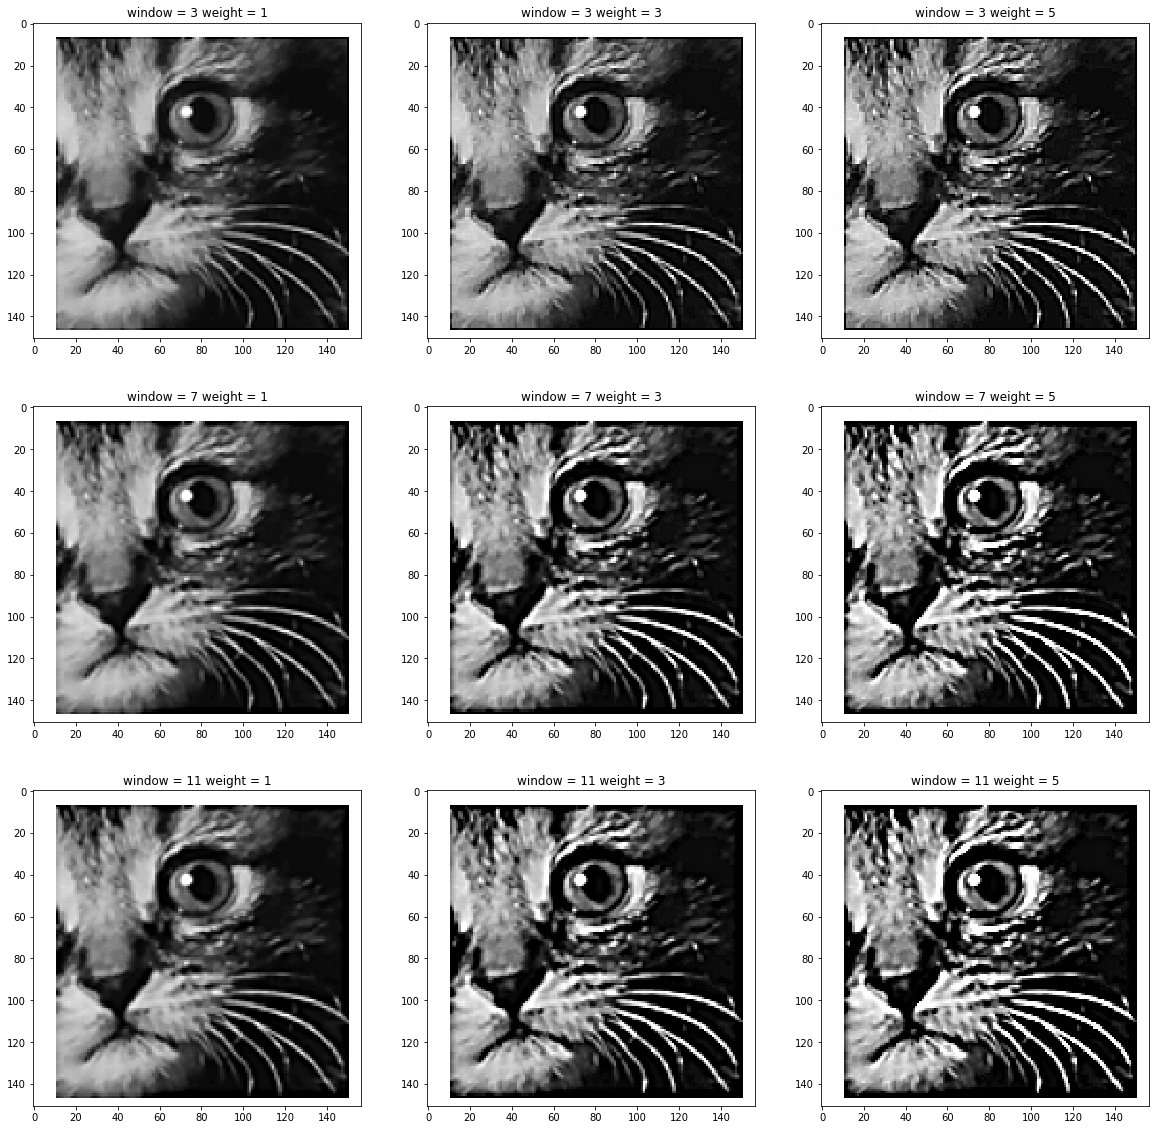

In [15]:
window = -1
weight = 3
_, plots = plt.subplots(3,3,figsize = (20,20))
for i in range(3):
    weight = 1
    window += 4
    for j in range(3):
        plots[i][j].imshow(highBoost(im, window, weight))
        plots[i][j].set_title('window = ' + str(window) + ' weight = ' + str(weight))
        weight += 2

plt.show()

## Part 3

- Bilateral Filter retains the edges in the image and smoothens the other regions whereas highboost filter sharpens the whole image.
- The kernel is calculated for each window in the image while in bilateral filter while  the kernel is fixed in highboost filter